In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_daily_final.xlsx") # Read Excel
df1=xls_file.parse("Gasoil") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,LGOc1,LGOc3,LGOc6,LGOc9,LGOc12
Timestamp,,,,,
1988-06-24,133.00,134.50,138.0,137.50,NaN
1988-06-27,130.75,131.25,135.5,134.00,NaN
1988-06-28,130.00,130.75,135.5,134.00,NaN
1988-06-29,129.50,129.75,134.5,132.75,NaN
1988-06-30,128.75,128.00,133.5,131.50,NaN


<AxesSubplot:xlabel='Timestamp'>

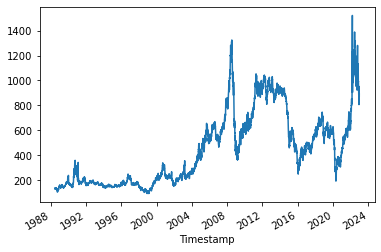

In [3]:
spot = df1["LGOc1"]
#spot = np.log(spot).diff()
spot.plot()

In [4]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count    8813.000000
mean      445.214954
std       292.250241
min        91.250000
25%       177.750000
50%       382.250000
75%       625.000000
max      1522.500000
Name: LGOc1, dtype: float64

In [5]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 0.7408606044844208
Skewness logs: 0.017150496719828715
Kurtosis spot: 2.5261088867815165
Kurtosis logs: 1.6296597456291997
JB spot: Jarque_beraResult(statistic=888.6700652445242, pvalue=0.0)
JB logs: Jarque_beraResult(statistic=689.9877525225627, pvalue=0.0)
Q(6) spot:         lb_stat  lb_pvalue
6  52473.547609        0.0
Q(6) logs:         lb_stat  lb_pvalue
6  52627.743712        0.0


In [6]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-1.9315060377324118, 0.3173878746069245, 35, 8777, {'1%': -3.431095267577725, '5%': -2.861869358883096, '10%': -2.566945312753904}, 68807.78136884407)
ADF logs: (-1.6381090016233688, 0.4632490644472098, 28, 8784, {'1%': -3.43109467349772, '5%': -2.861869096372004, '10%': -2.566945173017529}, -41670.706193844395)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.742
P-value                         0.410
Lags                               37
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.594
P-value                         0.487
Lags                               37
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process

In [7]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  9.372
P-value                         0.000
Lags                               56
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                 11.423
P-value                         0.000
Lags                               56
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


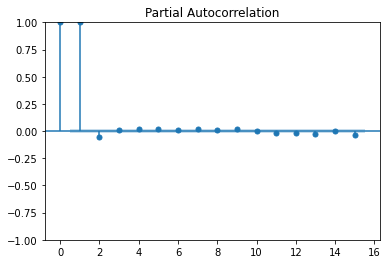

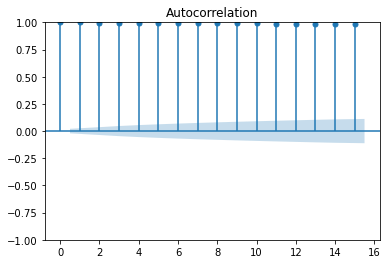

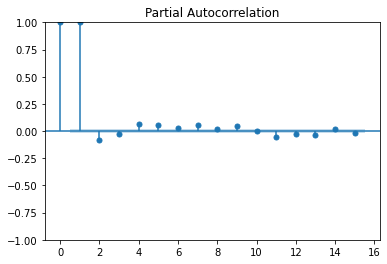

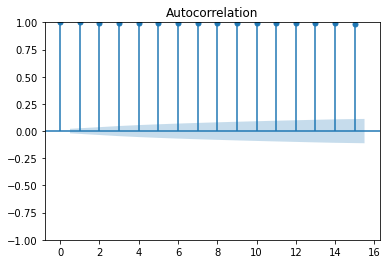

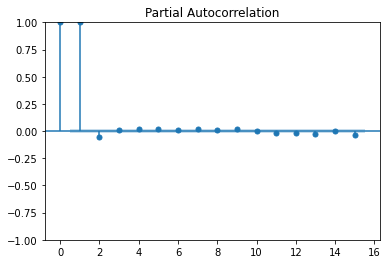

In [8]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

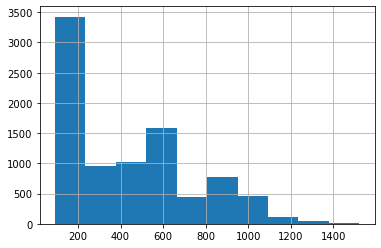

In [9]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

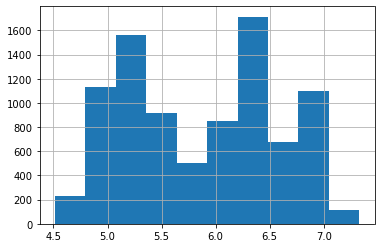

In [10]:
np.log(spot).hist()

In [11]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=6000)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=42919.454, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=42919.362, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=42916.320, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=42916.505, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=42918.845, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=42916.263, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=42917.951, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=42918.184, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=42917.219, Time=0.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=42919.960, Time=0.73 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=42915.610, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=42915.718, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=42917.317, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=42917.481, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0

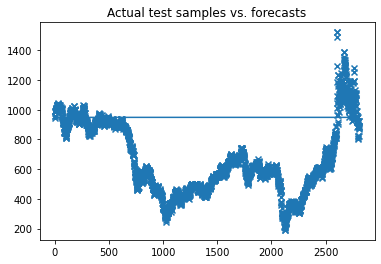

In [12]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [13]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6000
Model:               SARIMAX(2, 1, 0)   Log Likelihood              -21454.805
Date:                Tue, 27 Dec 2022   AIC                          42915.610
Time:                        18:43:41   BIC                          42935.708
Sample:                             0   HQIC                         42922.590
                               - 6000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0287      0.008      3.539      0.000       0.013       0.045
ar.L2          0.0187      0.007      2.849      0.004       0.006       0.032
sigma2        74.8079      0.443    168.793      0.000      73.939      75.677
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             83648.96
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.67   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

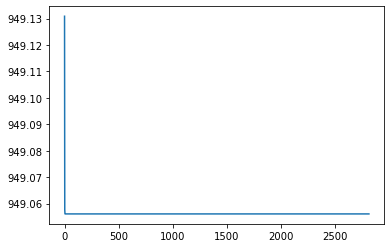

In [14]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [15]:
arima.predict(n_periods=test.shape[0])

array([949.1308875 , 949.06185278, 949.05764002, ..., 949.05607156,
       949.05607156, 949.05607156])

<AxesSubplot:xlabel='Timestamp'>

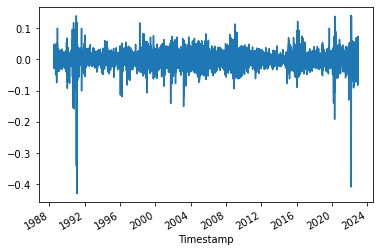

In [16]:
spot2 = np.log(spot).diff()
spot2.plot()

In [17]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    8811.000000
mean        0.000216
std         0.022569
min        -0.429205
25%        -0.009870
50%         0.000000
75%         0.010683
max         0.139988
Name: LGOc1, dtype: float64

In [18]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -1.9829664522636303
Kurtosis spot: 40.23461651669873
JB spot: Jarque_beraResult(statistic=514762.58993958763, pvalue=0.0)
Q(6) spot:     lb_stat     lb_pvalue
6  63.55943  8.488471e-12


In [19]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-16.898994263199572, 1.0311888640289756e-29, 27, 8783, {'1%': -3.4310947583082982, '5%': -2.8618691338479656, '10%': -2.5669451929662284}, -41658.74638973962)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -88.180
P-value                         0.000
Lags                               37
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [20]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.039
P-value                         0.939
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


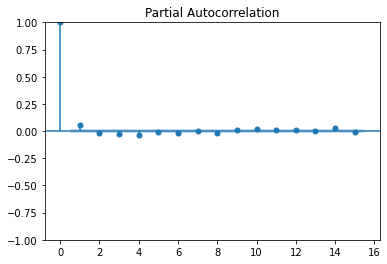

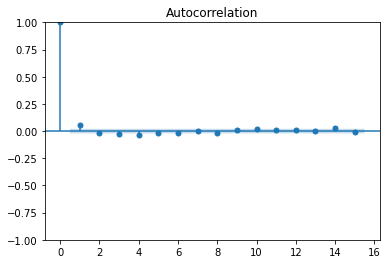

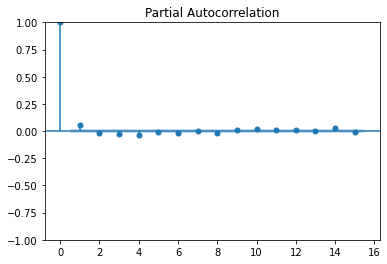

In [21]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

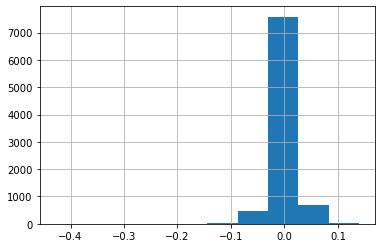

In [22]:
spot2.hist()


In [23]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=6000)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-28637.705, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-28615.511, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-28630.833, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-28631.365, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-28610.168, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-28610.970, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-28608.681, Time=0.48 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-28646.760, Time=1.14 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-28644.332, Time=0.42 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-28643.081, Time=0.63 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-28643.350, Time=1.09 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-28645.406, Time=1.08 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=-28641.365, Time=1.56 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-28646.457, Time=2.40 sec

Best

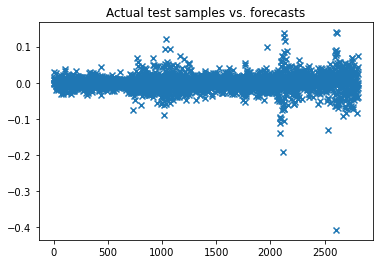

In [24]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [25]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6000
Model:               SARIMAX(2, 0, 3)   Log Likelihood               14329.380
Date:                Tue, 27 Dec 2022   AIC                         -28646.760
Time:                        18:43:54   BIC                         -28606.563
Sample:                             0   HQIC                        -28632.801
                               - 6000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1290      0.205      5.499      0.000       0.727       1.531
ar.L2         -0.4767      0.172     -2.765      0.006      -0.815      -0.139
ma.L1         -1.0780      0.206     -5.231      0.000      -1.482      -0.674
ma.L2          0.4029      0.163      2.465      0.014       0.083       0.723
ma.L3          0.0036      0.018      0.197      0.844      -0.032       0.040
sigma2         0.0005   3.01e-06    164.017      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            301256.30
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -1.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

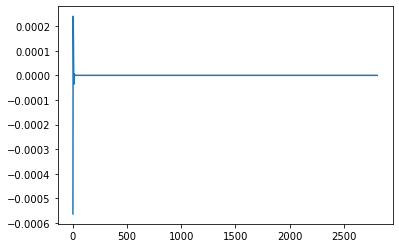

In [26]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [27]:
arima2.predict(n_periods=test2.shape[0])

array([-5.63237798e-04, -3.84137462e-05,  1.96510334e-04, ...,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [28]:
#cointegration tests

#normalized cv
#LR test

In [29]:
#correlaatiomatriisi

In [30]:
#np.argwhere(np.isnan(x))